# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [ ]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

/Users/omarnagy/Downloads/migration/.conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import os
print(os.getcwd())

/Users/omarnagy/Downloads/migration/Udacity_ML_Fundamentals/third project


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [ ]:

# Check if MPS device is available
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")




# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, )),
    transforms.Lambda(lambda x: torch.flatten(x)),
])

# Create training set and define training dataloader
trainset = torchvision.datasets.MNIST(root='/Users/omarnagy/Downloads/migration/Udacity_ML_Fundamentals/third project/MINST_Dataset', train=True, download=True, transform=transform)
train_loader = DataLoader(trainset, batch_size=2048, shuffle=True)

# Create test set and define test dataloader
testset = torchvision.datasets.MNIST(root='/Users/omarnagy/Downloads/migration/Udacity_ML_Fundamentals/third project/MINST_Dataset', train=False, download=True, transform=transform)
test_loader = DataLoader(testset, batch_size=2048, shuffle=False)


tensor([1.], device='mps:0')


In [80]:
print("Training set contains {} images".format(len(trainset)))
print("Test set contains {} images".format(len(testset)))
print("Test loader contains {} images".format(len(test_loader.dataset)))

Training set contains 60000 images
Test set contains 10000 images
Test loader contains 10000 images


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

Normalize the pixel values to have a mean of 0.5 and a standard deviation of 0.5. This helps in stabilizing and accelerating the training process. and converting it into tensors help scaling the pixel values from [0, 255] to [0, 1] which makes the calculations easier. and flatten just flattens the input tensor to be one dimensional which is needed as being the input to the deep neural network.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [21]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##

def show5(img_loader):
    dataiter = iter(img_loader)
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()


In [ ]:
# Explore data
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [119]:
# define the class for the neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.output = F.log_softmax
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        #x = self.output(self.fc3(x), dim=1) 
        x = self.fc3(x)
        return x
    
# Create an instance of the model
model = Net()

# upload the model to the mps device
model.to('mps')

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [106]:
loss_function = nn.CrossEntropyLoss() # multi-class classification

optimizer = optim.Adam(model.parameters(), lr=0.0001)

#optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.RMSprop(model.parameters(), lr=0.001)

In [54]:
def print_statistics_for_interval(i, epoch, running_loss, running_correct, running_total):

    # Print statistics every 250 batches
    if (i + 1) % 250 == 0:
        # Calculate and print the average loss and accuracy for the last 250 batches
        interval_loss = running_loss / 250
        interval_accuracy = 100 * running_correct / running_total

        print(f"Epoch: {epoch + 1}, Batch: {i + 1}, Loss: {interval_loss:.4f}, Accuracy: {interval_accuracy:.2f}%")

        # Reset running totals for the next interval
        running_correct = 0
        running_total = 0

In [94]:
def print_statistics_for_epoch(epoch, train_loss_history, train_correct, train_loss):

    print(f"{train_correct} of {len(train_loader.dataset)} are correct")
    print(f'Epoch {epoch + 1} training accuracy: {(train_correct/len(train_loader.dataset))*100:.2f}% training loss: {(train_loss/len(train_loader.dataset))*100:.5f}')
    print()
    # Append the loss to the history
    train_loss_history.append(train_loss/len(train_loader))

In [95]:
def validate_model(test_loader, model, loss_function, val_loss_history, epoch):
    val_loss = 0.0
    val_correct = 0
    model.eval()
    
    for inputs, labels in test_loader:
        inputs, labels = inputs.to('mps'), labels.to('mps')

        outputs = model(inputs)
        loss = loss_function(outputs, labels)

        _, preds = torch.max(outputs, 1)        
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    
    print(f"{val_correct} of {len(test_loader.dataset)} are correct")
    print(f'Epoch {epoch + 1} validation accuracy: {(val_correct/len(test_loader.dataset))*100:.2f}% validation loss: {(val_loss/len(test_loader.dataset))*100:.5f}')
    print()
    # Append the validation loss to the validation loss history
    val_loss_history.append(val_loss/len(test_loader))

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [120]:
# Train the model on the mps device and print the loss during each epoch in the training process using 250 batches 
num_epochs = 20

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    running_loss = 0.0
    running_correct = 0
    running_total = 0
    
    for i, data in enumerate(train_loader):
        # extract the inputs and labels from the data
        inputs, labels = data
        
        # upload the inputs and labels to the mps device
        inputs, labels = inputs.to('mps'), labels.to('mps')
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        
        # update the weights
        optimizer.step()
        
        # Accumulate loss
        running_loss += loss.item()
        
        '''
        # Compute predictions and accuracy
        _, preds = torch.max(outputs.data, 1)
        running_correct += (preds == labels).sum().item()
        running_total += labels.size(0)
        # Print statistics every 250 batches
        print_statistics_for_interval(i, epoch, running_loss, running_correct, running_total)
        '''
        
        # Compute the accuracy and print the accuracy and loss
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
        
    # Print statistics for the epoch    
    print_statistics_for_epoch(epoch, train_loss_history, train_correct, train_loss)
    
    # Validate the model
    validate_model(test_loader, model, loss_function, val_loss_history, epoch)  

4247 of 60000 are correct
Epoch 1 training accuracy: 7.08% training loss: 0.45314

745 of 10000 are correct
Epoch 1 validation accuracy: 7.45% validation loss: 0.46065

4247 of 60000 are correct
Epoch 2 training accuracy: 7.08% training loss: 0.45316

745 of 10000 are correct
Epoch 2 validation accuracy: 7.45% validation loss: 0.46065

4247 of 60000 are correct
Epoch 3 training accuracy: 7.08% training loss: 0.45319

745 of 10000 are correct
Epoch 3 validation accuracy: 7.45% validation loss: 0.46065

4247 of 60000 are correct
Epoch 4 training accuracy: 7.08% training loss: 0.45317

745 of 10000 are correct
Epoch 4 validation accuracy: 7.45% validation loss: 0.46065

4247 of 60000 are correct
Epoch 5 training accuracy: 7.08% training loss: 0.45315

745 of 10000 are correct
Epoch 5 validation accuracy: 7.45% validation loss: 0.46065

4247 of 60000 are correct
Epoch 6 training accuracy: 7.08% training loss: 0.45313

745 of 10000 are correct
Epoch 6 validation accuracy: 7.45% validation l

Plot the training loss (and validation loss/accuracy, if recorded).

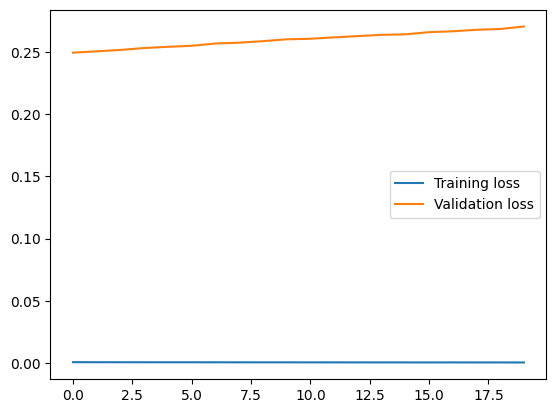

In [110]:
# Plot the training and validation loss
plt.plot(train_loss_history, label='Training loss')
plt.plot(val_loss_history, label='Validation loss')
plt.legend()
plt.show()


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [ ]:
# already done above

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [115]:
# tbh I don't know what to do here, I'm just going to copy the code from the previous cell as I already chaged hyperparameters and the optimizer once and I got 98.09% accuracy..... so I'm just going to copy the code and run it again.

num_epochs = 20

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    running_loss = 0.0
    running_correct = 0
    running_total = 0
    
    for i, data in enumerate(train_loader):
        # extract the inputs and labels from the data
        inputs, labels = data
        
        # upload the inputs and labels to the mps device
        inputs, labels = inputs.to('mps'), labels.to('mps')
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        
        # update the weights
        optimizer.step()
        
        # Accumulate loss
        running_loss += loss.item()
        
        '''
        # Compute predictions and accuracy
        _, preds = torch.max(outputs.data, 1)
        running_correct += (preds == labels).sum().item()
        running_total += labels.size(0)
        # Print statistics every 250 batches
        print_statistics_for_interval(i, epoch, running_loss, running_correct, running_total)
        '''
        
        # Compute the accuracy and print the accuracy and loss
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
        
    # Print statistics for the epoch    
    print_statistics_for_epoch(epoch, train_loss_history, train_correct, train_loss)
    
    # Validate the model
    validate_model(test_loader, model, loss_function, val_loss_history, epoch)

59995 of 60000 are correct
Epoch 1 training accuracy: 99.99% training loss: 0.00004

9803 of 10000 are correct
Epoch 1 validation accuracy: 98.03% validation loss: 0.06546

59995 of 60000 are correct
Epoch 2 training accuracy: 99.99% training loss: 0.00004

9804 of 10000 are correct
Epoch 2 validation accuracy: 98.04% validation loss: 0.06510

59995 of 60000 are correct
Epoch 3 training accuracy: 99.99% training loss: 0.00004

9797 of 10000 are correct
Epoch 3 validation accuracy: 97.97% validation loss: 0.06601

59995 of 60000 are correct
Epoch 4 training accuracy: 99.99% training loss: 0.00005

9804 of 10000 are correct
Epoch 4 validation accuracy: 98.04% validation loss: 0.06493

59997 of 60000 are correct
Epoch 5 training accuracy: 100.00% training loss: 0.00004

9803 of 10000 are correct
Epoch 5 validation accuracy: 98.03% validation loss: 0.06543

59997 of 60000 are correct
Epoch 6 training accuracy: 100.00% training loss: 0.00004

9803 of 10000 are correct
Epoch 6 validation acc

## Saving your model
Using `torch.save`, save your model for future loading.

In [116]:
# save the model
torch.save(model.state_dict(), 'model01.pth')

In [117]:
# Just to make sure that the model is saved correctly, I'm going to load the model and test it on the test set.

# load the model
model = Net()
model.load_state_dict(torch.load('model01.pth'))
model.to('mps')
model.eval()

# test the model
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to('mps'), labels.to('mps')
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')


Accuracy of the network on the 10000 test images: 98.07%
